In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [3]:
#This are stop_words in common taken from intenet. OR import stopwords from nltk.corpus
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [4]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("C:/Users/Navee/Downloads/20_newsgroups"):
    for document in os.listdir("C:/Users/Navee/Downloads/20_newsgroups/"+category):
        with open("C:/Users/Navee/Downloads/20_newsgroups/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))       #a list
            Y.append(category)

In [5]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [6]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [7]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14999
5000


In [8]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_words :
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1

In [11]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)

In [12]:
import matplotlib.pyplot as plt


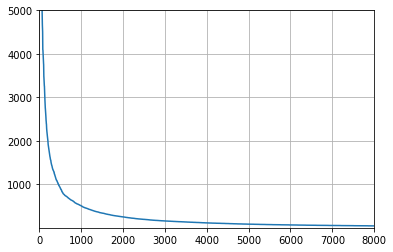

In [13]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [15]:
#We decided to take top 2000 words with max frequency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]

In [16]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [20]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [23]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)
x_train_dataset.shape

[[ 9  1  2 ...  0  0  0]
 [ 5  3  6 ...  0  0  0]
 [12  4  0 ...  0  0  0]
 ...
 [12  3  0 ...  0  0  0]
 [ 4  3  1 ...  0  0  0]
 [ 6  4  3 ...  0  0  0]]
--------------------------
[[7 3 1 ... 0 0 0]
 [4 3 1 ... 0 0 0]
 [9 3 2 ... 0 0 0]
 ...
 [6 4 6 ... 0 0 0]
 [6 4 6 ... 0 0 0]
 [7 1 1 ... 0 0 0]]


(14997, 2000)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [26]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8959125158365007
Score on testing data: 0.8518
[[204   0   0   1   0   0   0   0   2   0   0   0   0   0   0   3   0   2
    0  36]
 [  0 165  12  11  14  15  12   4   0   1   0   0   3   1   1   0   0   0
    0   0]
 [  0   4 195  13   6  15   8   3   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  1   2   6 211  39   1   5   0   1   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   3   1  19 199   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  12  18   6   4 185   5   0   1   0   0   0   1   2   4   0   0   0
    0   0]
 [  0   0   1   3   5   1 211   7   0   0   0   0   3   2   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   2 261   3   0   0   0   4   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   1   5   3 233   1   0   0   0   1   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   6   3   5 228  17   0   0   0   0   0   1   0
    0   0]
 [  1   0   0   0   0   0   1   1   1  10 232   0   0   1   0   0   0   0
   